In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


In [4]:
# Reading the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Let's check the first few rows of each dataset
print("Customers Dataset:")
print(customers_df.head())
print("\nProducts Dataset:")
print(products_df.head())
print("\nTransactions Dataset:")
print(transactions_df.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [5]:
# Basic information about each dataset
print("CUSTOMERS DATASET INFO:")
print(customers_df.info())
print("\nShape:", customers_df.shape)
print("\nMissing values:\n", customers_df.isnull().sum())
print("\n" + "="*50 + "\n")

print("PRODUCTS DATASET INFO:")
print(products_df.info())
print("\nShape:", products_df.shape)
print("\nMissing values:\n", products_df.isnull().sum())
print("\n" + "="*50 + "\n")

print("TRANSACTIONS DATASET INFO:")
print(transactions_df.info())
print("\nShape:", transactions_df.shape)
print("\nMissing values:\n", transactions_df.isnull().sum())

# Basic statistical description of numerical columns
print("\nTransactions Statistical Summary:")
print(transactions_df.describe())

CUSTOMERS DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Shape: (200, 4)

Missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


PRODUCTS DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Shape: (100, 4)



In [6]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Add some basic derived features
transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month

# Let's look at the unique values in categorical columns
print("Unique Regions:", customers_df['Region'].unique())
print("\nUnique Product Categories:", products_df['Category'].unique())

# Quick check of the date ranges
print("\nCustomer Signup Date Range:")
print("Earliest:", customers_df['SignupDate'].min())
print("Latest:", customers_df['SignupDate'].max())

print("\nTransaction Date Range:")
print("Earliest:", transactions_df['TransactionDate'].min())
print("Latest:", transactions_df['TransactionDate'].max())

Unique Regions: ['South America' 'Asia' 'North America' 'Europe']

Unique Product Categories: ['Books' 'Electronics' 'Home Decor' 'Clothing']

Customer Signup Date Range:
Earliest: 2022-01-22 00:00:00
Latest: 2024-12-28 00:00:00

Transaction Date Range:
Earliest: 2023-12-30 15:29:12
Latest: 2024-12-28 11:00:00


<Figure size 1500x1000 with 0 Axes>

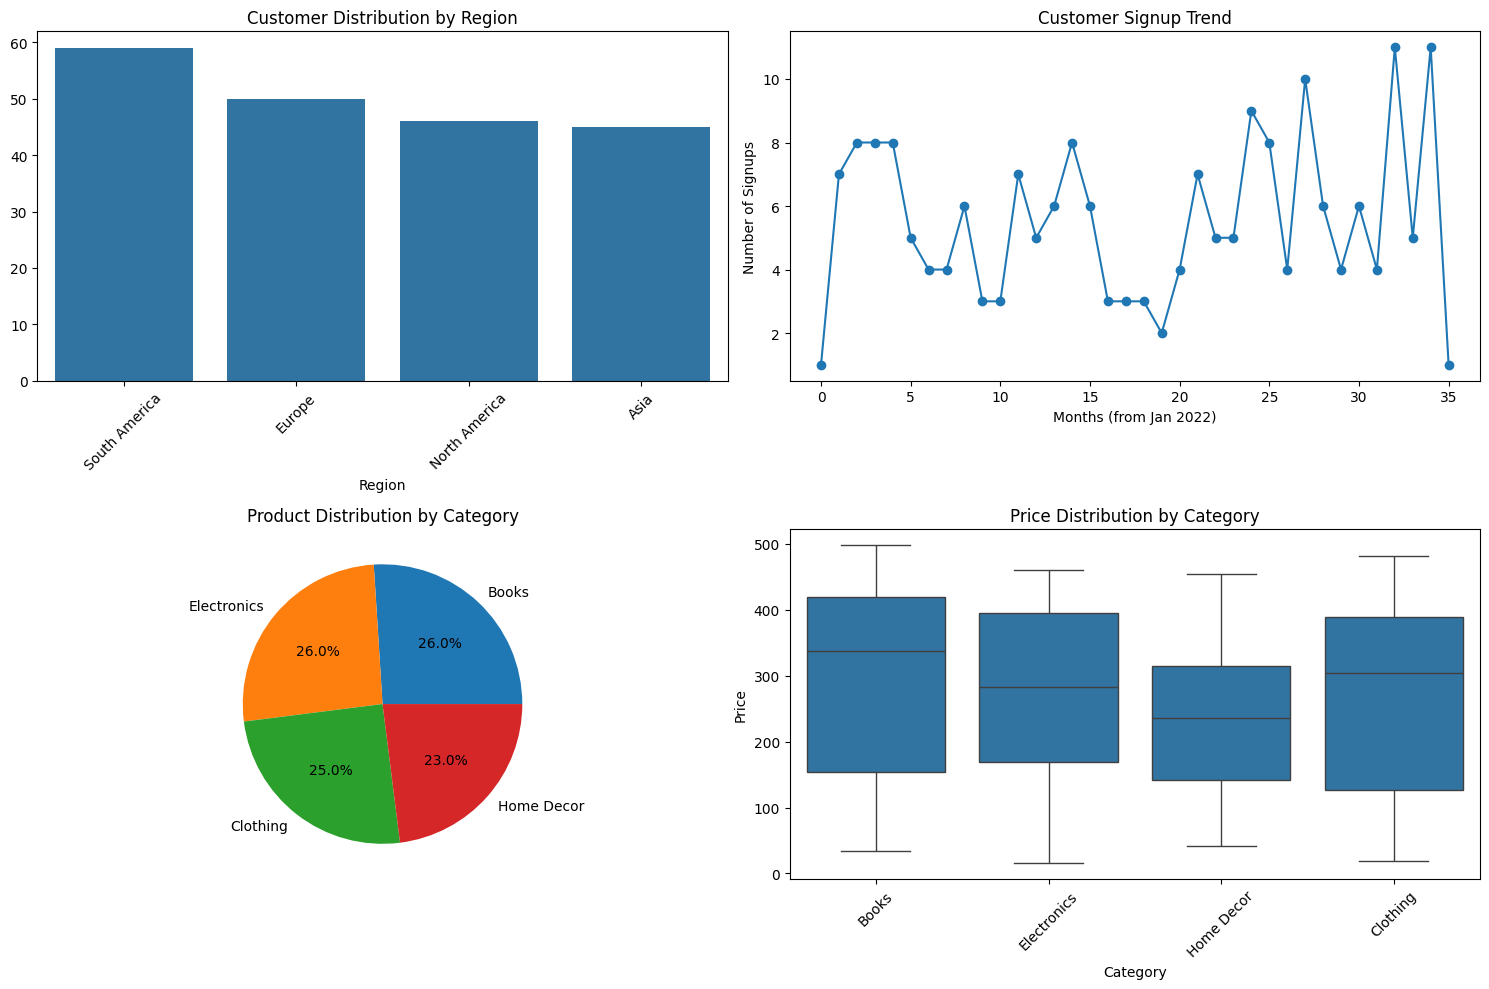


Summary Statistics:

Average Price by Category:
Category
Books          292.21
Clothing       263.72
Electronics    275.35
Home Decor     235.02
Name: Price, dtype: float64

Transaction Value by Region:
                 mean  count
Region                      
Asia           697.59    218
Europe         710.49    234
North America  624.24    244
South America  721.55    304


In [8]:
# Set figure size and create subplots
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Customer distribution by region
customers_by_region = customers_df['Region'].value_counts()
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, ax=axes[0,0])
axes[0,0].set_title('Customer Distribution by Region')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Customer signup trend
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
monthly_signups = customers_df.groupby('SignupMonth').size()
axes[0,1].plot(range(len(monthly_signups)), monthly_signups.values, marker='o')
axes[0,1].set_title('Customer Signup Trend')
axes[0,1].set_xlabel('Months (from Jan 2022)')
axes[0,1].set_ylabel('Number of Signups')

# 3. Product distribution by category
products_by_category = products_df['Category'].value_counts()
axes[1,0].pie(products_by_category.values, labels=products_by_category.index, autopct='%1.1f%%')
axes[1,0].set_title('Product Distribution by Category')

# 4. Price distribution by category
sns.boxplot(data=products_df, x='Category', y='Price', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
print("\nAverage Price by Category:")
print(products_df.groupby('Category')['Price'].mean().round(2))

print("\nTransaction Value by Region:")
merged_df = transactions_df.merge(customers_df, on='CustomerID')
print(merged_df.groupby('Region')['TotalValue'].agg(['mean', 'count']).round(2))

In [9]:
# Calculate some key transaction metrics
# 1. Average items per transaction by region
avg_items = merged_df.groupby('Region')['Quantity'].mean().round(2)
print("Average Items per Transaction by Region:")
print(avg_items)
print("\n")

# 2. Most popular product categories by region
merged_with_products = merged_df.merge(products_df, on='ProductID')
category_by_region = merged_with_products.groupby(['Region', 'Category'])['TransactionID'].count().unstack()
print("Product Category Distribution by Region:")
print(category_by_region)
print("\n")

# 3. Monthly transaction trends
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].agg(['count', 'sum']).round(2)
print("Monthly Transaction Trends:")
print(monthly_sales)

Average Items per Transaction by Region:
Region
Asia             2.57
Europe           2.54
North America    2.43
South America    2.60
Name: Quantity, dtype: float64


Product Category Distribution by Region:
Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia              51        58           57          52
Europe            64        47           58          65
North America     65        60           60          59
South America     90        63           79          72


Monthly Transaction Trends:
                  count       sum
TransactionMonth                 
2023-12               4   3769.52
2024-01             107  66376.39
2024-02              77  51459.27
2024-03              80  47828.73
2024-04              86  57519.06
2024-05              86  64527.74
2024-06              69  48771.18
2024-07              96  71366.39
2024-08              94  63436.74
2024-09              96  70603.75
2024-10         

<Figure size 1500x1000 with 0 Axes>

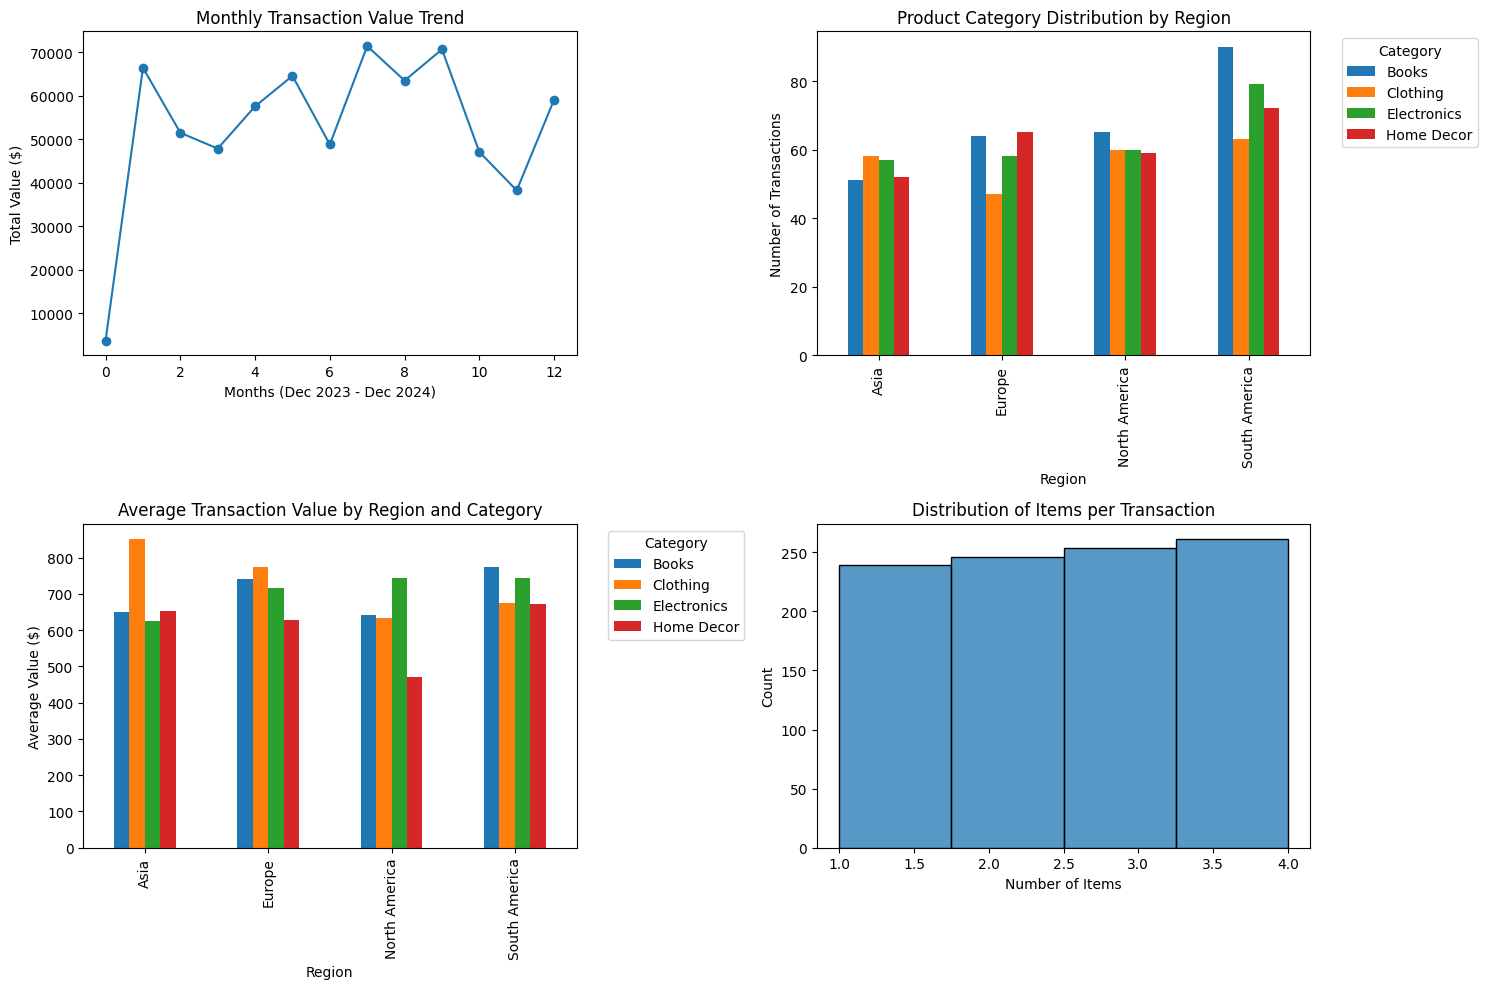


Key Business Metrics:

1. Peak Sales Month: 2024-07
2. Most Popular Category by Region:
Asia: Clothing
Europe: Home Decor
North America: Books
South America: Books


In [10]:
# Create a figure with subplots
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Monthly Transaction Value Trend
monthly_sales.reset_index(inplace=True)
axes[0,0].plot(range(len(monthly_sales)), monthly_sales['sum'], marker='o')
axes[0,0].set_title('Monthly Transaction Value Trend')
axes[0,0].set_xlabel('Months (Dec 2023 - Dec 2024)')
axes[0,0].set_ylabel('Total Value ($)')

# 2. Category Distribution by Region
category_by_region.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Product Category Distribution by Region')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Number of Transactions')
axes[0,1].legend(title='Category', bbox_to_anchor=(1.05, 1))

# 3. Average Transaction Value by Region and Category
avg_value_by_region_cat = merged_with_products.groupby(['Region', 'Category'])['TotalValue'].mean().unstack()
avg_value_by_region_cat.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Transaction Value by Region and Category')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Average Value ($)')
axes[1,0].legend(title='Category', bbox_to_anchor=(1.05, 1))

# 4. Transaction Quantity Distribution
sns.histplot(data=merged_df, x='Quantity', bins=4, ax=axes[1,1])
axes[1,1].set_title('Distribution of Items per Transaction')
axes[1,1].set_xlabel('Number of Items')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate some additional metrics
print("\nKey Business Metrics:")
print("\n1. Peak Sales Month:", monthly_sales.loc[monthly_sales['sum'].idxmax(), 'TransactionMonth'])
print("2. Most Popular Category by Region:")
for region in category_by_region.index:
    print(f"{region}: {category_by_region.loc[region].idxmax()}")

In [12]:
# Let's check the column names in our dataframes
print("Customers DataFrame Columns:")
print(customers_df.columns.tolist())
print("\nTransactions DataFrame Columns:")
print(transactions_df.columns.tolist())
print("\nProducts DataFrame Columns:")
print(products_df.columns.tolist())

Customers DataFrame Columns:
['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'SignupMonth']

Transactions DataFrame Columns:
['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price', 'Year', 'Month']

Products DataFrame Columns:
['ProductID', 'ProductName', 'Category', 'Price']


In [13]:
# Create customer feature dataset
def create_customer_features(customers_df, transactions_df, products_df):
    # Merge transactions with products to get category information
    trans_prod = transactions_df.merge(products_df, on='ProductID')

    # Calculate customer level metrics
    customer_features = transactions_df.groupby('CustomerID').agg({
        'TransactionID': 'count',  # Number of transactions
        'Quantity': ['sum', 'mean'],  # Total and average items purchased
        'TotalValue': ['sum', 'mean']  # Total and average spending
    }).reset_index()

    # Flatten column names
    customer_features.columns = ['CustomerID', 'total_transactions', 'total_items',
                               'avg_items_per_transaction', 'total_spend', 'avg_transaction_value']

    # Add category preferences (percentage of transactions in each category)
    category_pivot = pd.crosstab(
        trans_prod['CustomerID'],
        trans_prod['Category'],
        normalize='index'
    ).reset_index()

    # Merge customer region information
    region_dummies = pd.get_dummies(customers_df['Region'], prefix='region')
    customers_temp = customers_df.join(region_dummies)

    # Drop unnecessary columns and merge
    customers_temp = customers_temp.drop(['CustomerName', 'Region', 'SignupMonth'], axis=1)
    customer_features = customer_features.merge(customers_temp, on='CustomerID')

    # Calculate account age in days
    customer_features['account_age_days'] = (
        pd.to_datetime('2024-12-28') - pd.to_datetime(customer_features['SignupDate'])
    ).dt.days

    # Drop the date column after calculating age
    customer_features.drop(['SignupDate'], axis=1, inplace=True)

    return customer_features

# Create feature dataset
customer_features = create_customer_features(customers_df, transactions_df, products_df)

# Display the first few rows and shape of our feature dataset
print("Feature Dataset Shape:", customer_features.shape)
print("\nFeature Columns:", customer_features.columns.tolist())
print("\nFirst few rows:")
print(customer_features.head())

# Also display basic statistics of the features
print("\nFeature Statistics:")
print(customer_features.describe())

Feature Dataset Shape: (199, 11)

Feature Columns: ['CustomerID', 'total_transactions', 'total_items', 'avg_items_per_transaction', 'total_spend', 'avg_transaction_value', 'region_Asia', 'region_Europe', 'region_North America', 'region_South America', 'account_age_days']

First few rows:
  CustomerID  total_transactions  total_items  avg_items_per_transaction  \
0      C0001                   5           12                   2.400000   
1      C0002                   4           10                   2.500000   
2      C0003                   4           14                   3.500000   
3      C0004                   8           23                   2.875000   
4      C0005                   3            7                   2.333333   

   total_spend  avg_transaction_value  region_Asia  region_Europe  \
0      3354.52                670.904        False          False   
1      1862.74                465.685         True          False   
2      2725.38                681.345        Fa

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def create_lookalike_recommendations(customer_features, n_recommendations=3):
    # Select features for similarity calculation
    features_for_similarity = [
        'total_transactions', 'total_items', 'avg_items_per_transaction',
        'total_spend', 'avg_transaction_value', 'region_Asia', 'region_Europe',
        'region_North America', 'region_South America', 'account_age_days'
    ]

    # Prepare feature matrix
    X = customer_features[features_for_similarity].copy()

    # Scale the numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(X_scaled)

    # Create recommendations dictionary
    recommendations = {}
    customer_ids = customer_features['CustomerID'].values

    # Generate recommendations for first 20 customers
    for idx, customer_id in enumerate(customer_ids[:20]):
        # Get similarity scores
        similarity_scores = similarity_matrix[idx]

        # Get indices of top similar customers (excluding self)
        similar_indices = np.argsort(similarity_scores)[::-1][1:n_recommendations+1]

        # Get customer IDs and similarity scores
        similar_customers = [
            (customer_ids[i], similarity_scores[i])
            for i in similar_indices
        ]

        recommendations[customer_id] = similar_customers

    return recommendations

# Generate recommendations
lookalike_recommendations = create_lookalike_recommendations(customer_features)

# Create DataFrame for Lookalike.csv
lookalike_data = []
for customer_id, recommendations in lookalike_recommendations.items():
    row = {
        'customer_id': customer_id,
        'recommendation_1': f"{recommendations[0][0]} ({recommendations[0][1]:.3f})",
        'recommendation_2': f"{recommendations[1][0]} ({recommendations[1][1]:.3f})",
        'recommendation_3': f"{recommendations[2][0]} ({recommendations[2][1]:.3f})"
    }
    lookalike_data.append(row)

lookalike_df = pd.DataFrame(lookalike_data)

# Display the recommendations
print("Lookalike Recommendations for first 20 customers:")
print(lookalike_df)

# Save to CSV
lookalike_df.to_csv('FirstName_LastName_Lookalike.csv', index=False)

Lookalike Recommendations for first 20 customers:
   customer_id recommendation_1 recommendation_2 recommendation_3
0        C0001    C0174 (0.963)    C0152 (0.949)    C0107 (0.948)
1        C0002    C0106 (0.922)    C0159 (0.909)    C0005 (0.906)
2        C0003    C0129 (0.862)    C0190 (0.853)    C0039 (0.775)
3        C0004    C0113 (0.982)    C0165 (0.968)    C0102 (0.967)
4        C0005    C0159 (0.976)    C0007 (0.934)    C0002 (0.906)
5        C0006    C0168 (0.894)    C0171 (0.854)    C0148 (0.844)
6        C0007    C0159 (0.963)    C0005 (0.934)    C0193 (0.932)
7        C0008    C0024 (0.895)    C0194 (0.883)    C0098 (0.878)
8        C0009    C0119 (0.966)    C0121 (0.900)    C0198 (0.888)
9        C0010    C0062 (0.917)    C0197 (0.906)    C0086 (0.903)
10       C0011    C0107 (0.974)    C0001 (0.943)    C0133 (0.913)
11       C0012    C0013 (0.966)    C0039 (0.942)    C0195 (0.940)
12       C0013    C0012 (0.966)    C0087 (0.936)    C0155 (0.866)
13       C0014    C0063 (0

In [16]:
def analyze_recommendations(customer_id, similar_customers, customer_features):
    # Get features for the target customer and their recommendations
    similar_ids = [cust_id.split()[0] for cust_id in similar_customers]  # Extract just the IDs
    customer_ids = [customer_id] + similar_ids

    comparison_df = customer_features[customer_features['CustomerID'].isin(customer_ids)].copy()

    # Add a label column
    comparison_df['type'] = ['Target' if id == customer_id else f'Rec_{i+1}'
                            for i, id in enumerate(comparison_df['CustomerID'])]

    # Reorder columns for better readability
    cols = ['type', 'CustomerID', 'total_transactions', 'avg_transaction_value',
            'total_spend', 'account_age_days']

    print(f"\nComparison for customer {customer_id}:")
    print(comparison_df[cols].round(2))
    print("\nRegion information:")
    region_cols = ['type', 'CustomerID'] + [col for col in comparison_df.columns if 'region_' in col]
    print(comparison_df[region_cols])
    print("-" * 80)

# Let's analyze a few examples
for customer_id in ['C0001', 'C0002', 'C0003']:
    similar_customers = lookalike_df[lookalike_df['customer_id'] == customer_id].iloc[0][1:].values
    analyze_recommendations(customer_id, similar_customers, customer_features)


Comparison for customer C0001:
       type CustomerID  total_transactions  avg_transaction_value  \
0    Target      C0001                   5                 670.90   
106   Rec_2      C0107                   5                 724.78   
151   Rec_3      C0152                   5                 677.17   
173   Rec_4      C0174                   5                 578.39   

     total_spend  account_age_days  
0        3354.52               902  
106      3623.92               690  
151      3385.86               984  
173      2891.95               786  

Region information:
       type CustomerID  region_Asia  region_Europe  region_North America  \
0    Target      C0001        False          False                 False   
106   Rec_2      C0107        False          False                 False   
151   Rec_3      C0152        False          False                 False   
173   Rec_4      C0174        False          False                 False   

     region_South America  
0      

Number of clusters: 2, Davies-Bouldin Index: 1.858
Number of clusters: 3, Davies-Bouldin Index: 1.750
Number of clusters: 4, Davies-Bouldin Index: 1.599
Number of clusters: 5, Davies-Bouldin Index: 1.240
Number of clusters: 6, Davies-Bouldin Index: 1.257
Number of clusters: 7, Davies-Bouldin Index: 1.230
Number of clusters: 8, Davies-Bouldin Index: 1.206
Number of clusters: 9, Davies-Bouldin Index: 1.241
Number of clusters: 10, Davies-Bouldin Index: 1.195


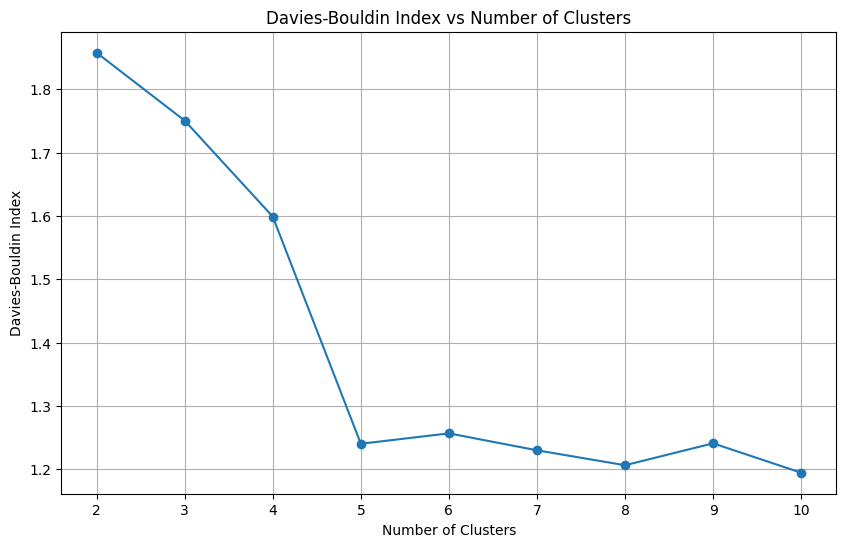


Optimal number of clusters based on DB Index: 10


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial.distance import cdist

# Prepare features for clustering
def prepare_clustering_features(customer_features):
    # Select features for clustering
    clustering_features = [
        'total_transactions', 'total_items', 'avg_items_per_transaction',
        'total_spend', 'avg_transaction_value', 'account_age_days',
        'region_Asia', 'region_Europe', 'region_North America', 'region_South America'
    ]

    # Create feature matrix
    X = customer_features[clustering_features].copy()

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, clustering_features

# Calculate Davies-Bouldin Index
def calculate_db_index(X, labels, centroids):
    n_clusters = len(np.unique(labels))

    # Calculate cluster dispersions (average distance within clusters)
    cluster_dispersions = np.zeros(n_clusters)
    for i in range(n_clusters):
        if np.sum(labels == i) > 0:  # Check if cluster is not empty
            cluster_points = X[labels == i]
            cluster_dispersions[i] = np.mean(
                np.sqrt(np.sum((cluster_points - centroids[i])**2, axis=1))
            )

    # Calculate Davies-Bouldin Index
    db_index = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                # Calculate centroid distance
                centroid_distance = np.sqrt(np.sum((centroids[i] - centroids[j])**2))
                if centroid_distance > 0:  # Avoid division by zero
                    ratio = (cluster_dispersions[i] + cluster_dispersions[j]) / centroid_distance
                    max_ratio = max(max_ratio, ratio)
        db_index += max_ratio

    return db_index / n_clusters

# Prepare data
X_scaled, feature_names = prepare_clustering_features(customer_features)

# Try different numbers of clusters and calculate DB Index
n_clusters_range = range(2, 11)
db_scores = []

for n_clusters in n_clusters_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Calculate DB Index
    db_index = calculate_db_index(X_scaled, labels, kmeans.cluster_centers_)
    db_scores.append(db_index)

    print(f"Number of clusters: {n_clusters}, Davies-Bouldin Index: {db_index:.3f}")

# Plot DB Index scores
plt.figure(figsize=(10, 6))
plt.plot(list(n_clusters_range), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.grid(True)
plt.show()

# Choose optimal number of clusters (lowest DB Index)
optimal_n_clusters = n_clusters_range[np.argmin(db_scores)]
print(f"\nOptimal number of clusters based on DB Index: {optimal_n_clusters}")

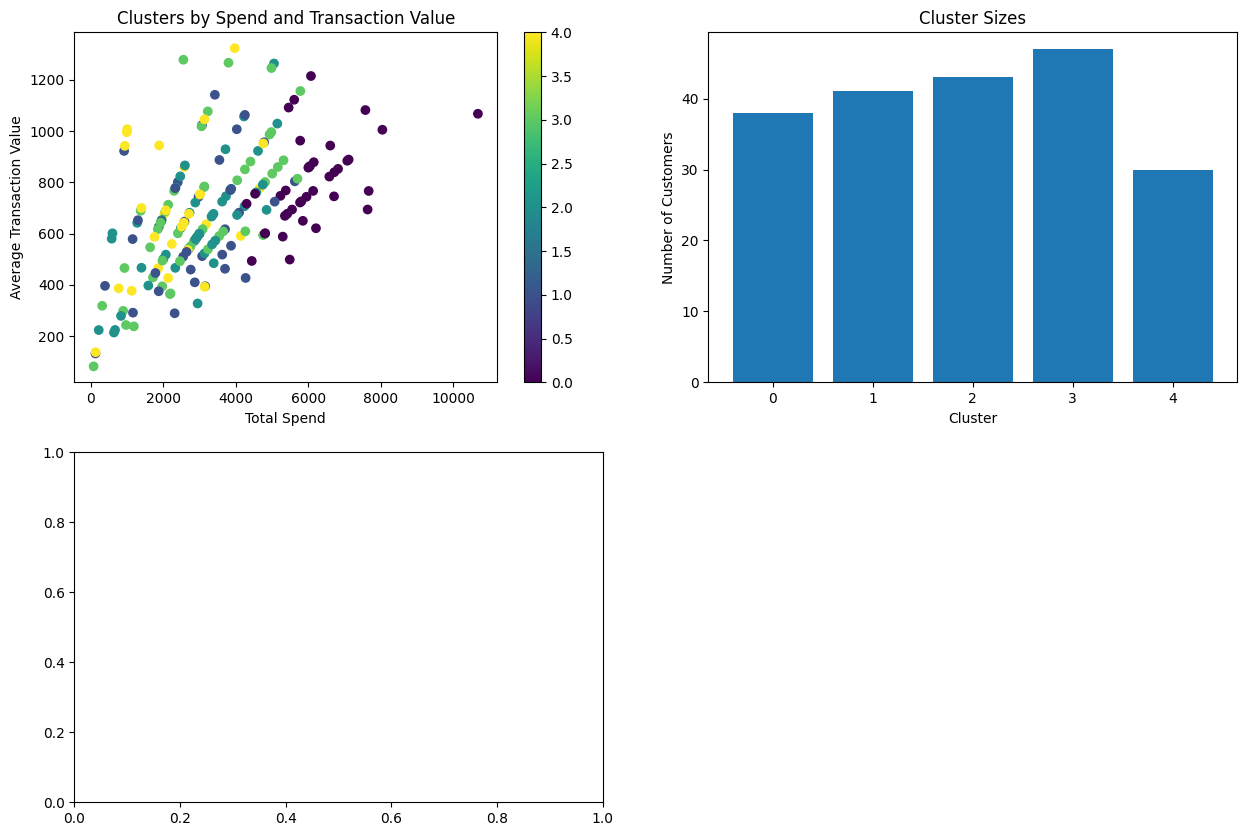

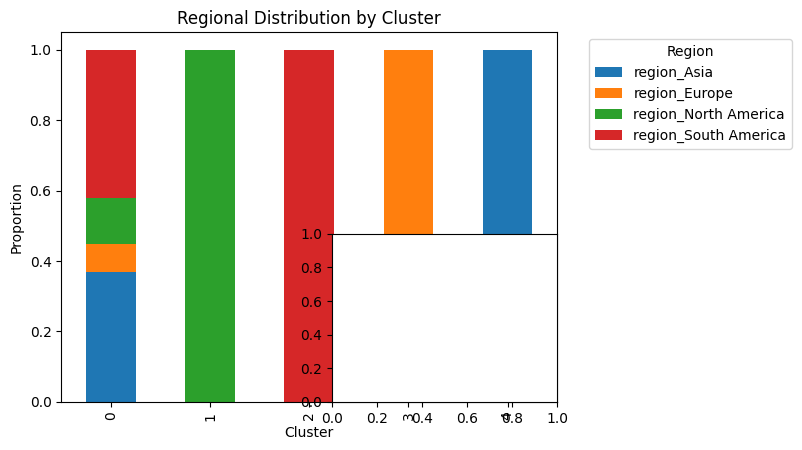

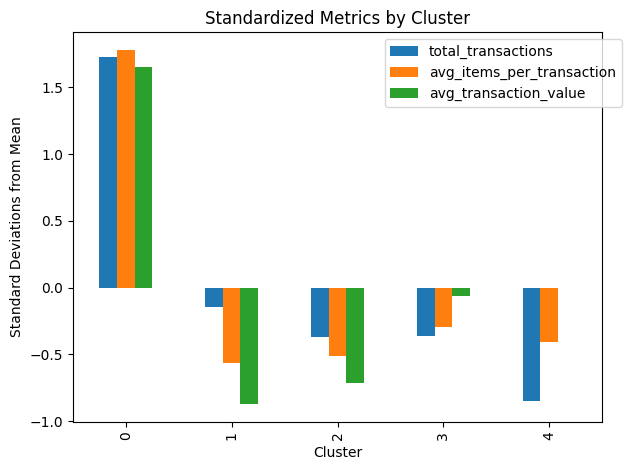


Cluster Characteristics:
         total_transactions  avg_transaction_value  total_spend  \
Cluster                                                           
0                      7.82                 802.12      6122.53   
1                      4.78                 630.51      2890.35   
2                      4.42                 641.48      2867.74   
3                      4.43                 685.52      3054.94   
4                      3.63                 689.81      2398.01   

         account_age_days  
Cluster                    
0                  579.13  
1                  411.98  
2                  563.14  
3                  548.00  
4                  541.00  

Clustering Metrics:
Davies-Bouldin Index: 1.240
Silhouette Score: 0.284
Calinski-Harabasz Score: 47.455


In [18]:
# Implement final clustering with 5 clusters
final_kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add cluster labels to customer features
customer_features['Cluster'] = cluster_labels

# Create visualizations for the clusters
plt.figure(figsize=(15, 10))

# 1. Scatter plot of total spend vs average transaction value
plt.subplot(2, 2, 1)
scatter = plt.scatter(customer_features['total_spend'],
                     customer_features['avg_transaction_value'],
                     c=cluster_labels,
                     cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')
plt.title('Clusters by Spend and Transaction Value')
plt.colorbar(scatter)

# 2. Cluster sizes
plt.subplot(2, 2, 2)
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
plt.bar(range(5), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Sizes')

# 3. Regional distribution within clusters
plt.subplot(2, 2, 3)
region_cols = [col for col in customer_features.columns if 'region_' in col]
cluster_regions = customer_features.groupby('Cluster')[region_cols].mean()
cluster_regions.plot(kind='bar', stacked=True)
plt.title('Regional Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))

# 4. Average metrics by cluster
plt.subplot(2, 2, 4)
metrics = ['total_transactions', 'avg_items_per_transaction', 'avg_transaction_value']
cluster_metrics = customer_features.groupby('Cluster')[metrics].mean()
cluster_metrics_scaled = (cluster_metrics - cluster_metrics.mean()) / cluster_metrics.std()
cluster_metrics_scaled.plot(kind='bar')
plt.title('Standardized Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standard Deviations from Mean')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
cluster_summary = customer_features.groupby('Cluster').agg({
    'total_transactions': 'mean',
    'avg_transaction_value': 'mean',
    'total_spend': 'mean',
    'account_age_days': 'mean'
}).round(2)

print(cluster_summary)

# Calculate and print clustering metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
calinski_score = calinski_harabasz_score(X_scaled, cluster_labels)

print("\nClustering Metrics:")
print(f"Davies-Bouldin Index: {db_scores[3]:.3f}")  # Index for 5 clusters
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_score:.3f}")

Detailed Cluster Profiles:
        CustomerID total_transactions       avg_transaction_value          \
             count               mean   std                  mean     std   
Cluster                                                                     
0               38               7.82  1.47                802.12  171.48   
1               41               4.78  2.07                630.51  226.83   
2               43               4.42  1.65                641.48  220.59   
3               47               4.43  1.60                685.52  277.69   
4               30               3.63  1.71                689.81  245.57   

        total_spend          account_age_days          
               mean      std             mean     std  
Cluster                                                
0           6122.53  1183.67           579.13  320.82  
1           2890.35  1219.43           411.98  332.69  
2           2867.74  1325.57           563.14  321.82  
3           3054.94 

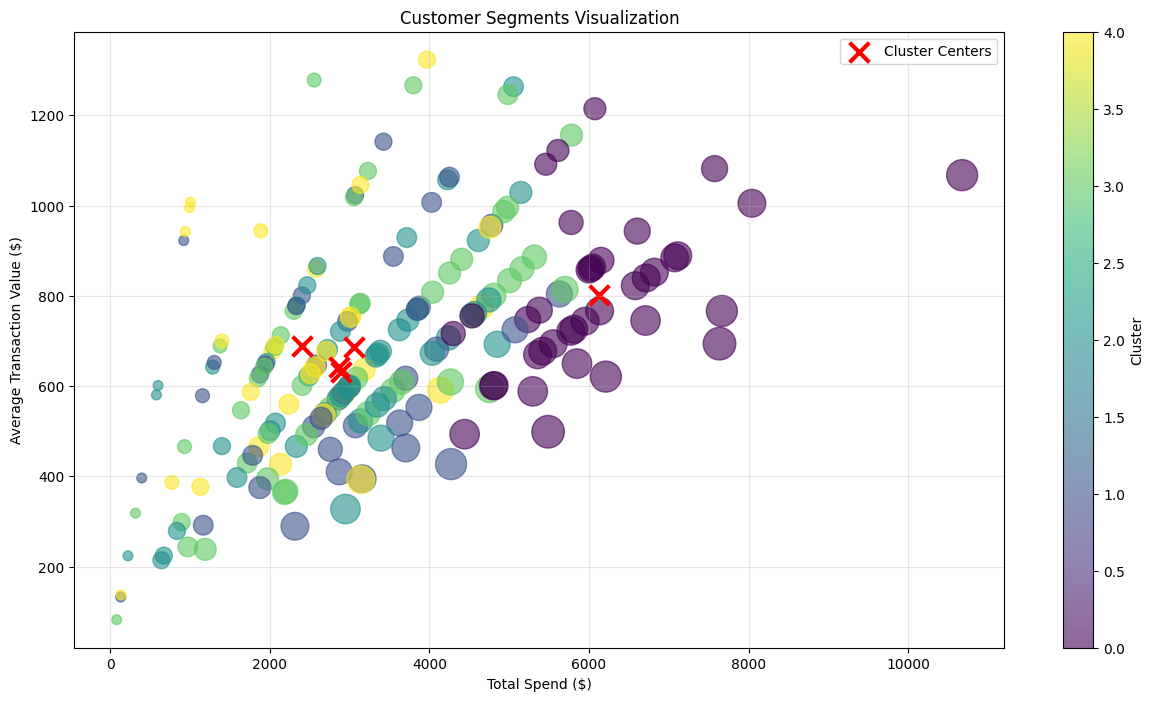

In [19]:
# Let's add some additional analysis to better understand each cluster
cluster_profiles = customer_features.groupby('Cluster').agg({
    'CustomerID': 'count',  # Size of cluster
    'total_transactions': ['mean', 'std'],
    'avg_transaction_value': ['mean', 'std'],
    'total_spend': ['mean', 'std'],
    'account_age_days': ['mean', 'std']
}).round(2)

print("Detailed Cluster Profiles:")
print(cluster_profiles)

# Regional distribution in each cluster
regional_dist = customer_features.groupby('Cluster')[
    ['region_Asia', 'region_Europe', 'region_North America', 'region_South America']
].mean().round(3) * 100  # Convert to percentage

print("\nRegional Distribution per Cluster (%):")
print(regional_dist)

# Let's create a better visualization of the clusters
plt.figure(figsize=(15, 8))

# Create scatter plot with size representing number of transactions
plt.scatter(customer_features['total_spend'],
           customer_features['avg_transaction_value'],
           c=cluster_labels,
           s=customer_features['total_transactions']*50,  # Size based on transactions
           alpha=0.6,
           cmap='viridis')

plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Value ($)')
plt.title('Customer Segments Visualization')
plt.colorbar(label='Cluster')

# Add cluster centers
centers = customer_features.groupby('Cluster')[['total_spend', 'avg_transaction_value']].mean()
plt.scatter(centers['total_spend'],
           centers['avg_transaction_value'],
           c='red',
           marker='x',
           s=200,
           linewidths=3,
           label='Cluster Centers')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

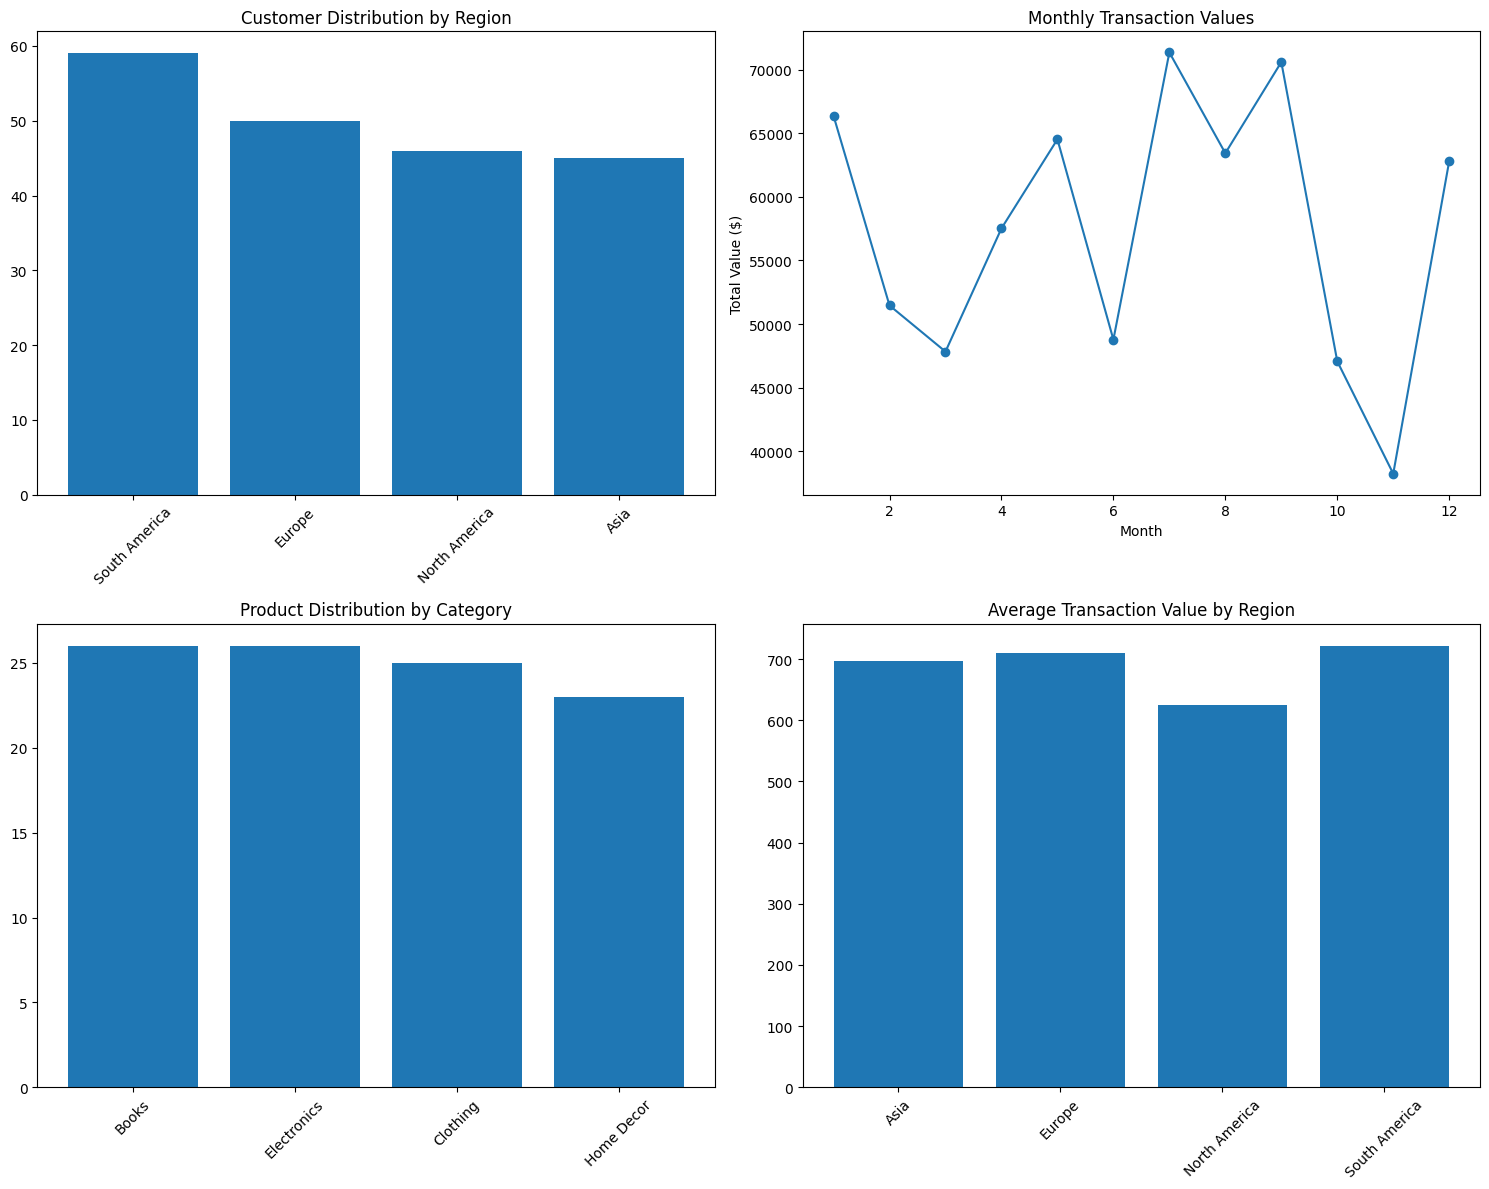

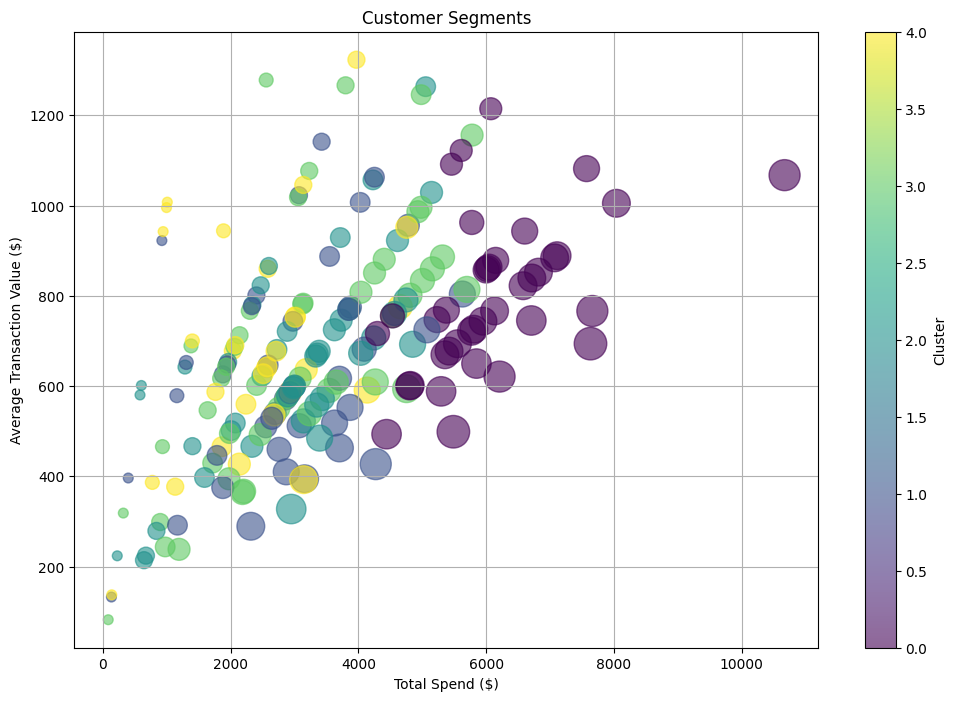

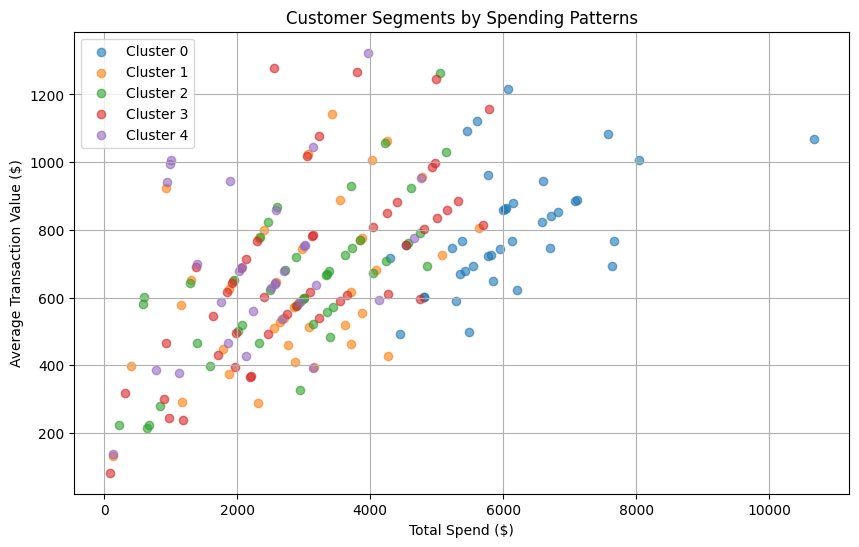

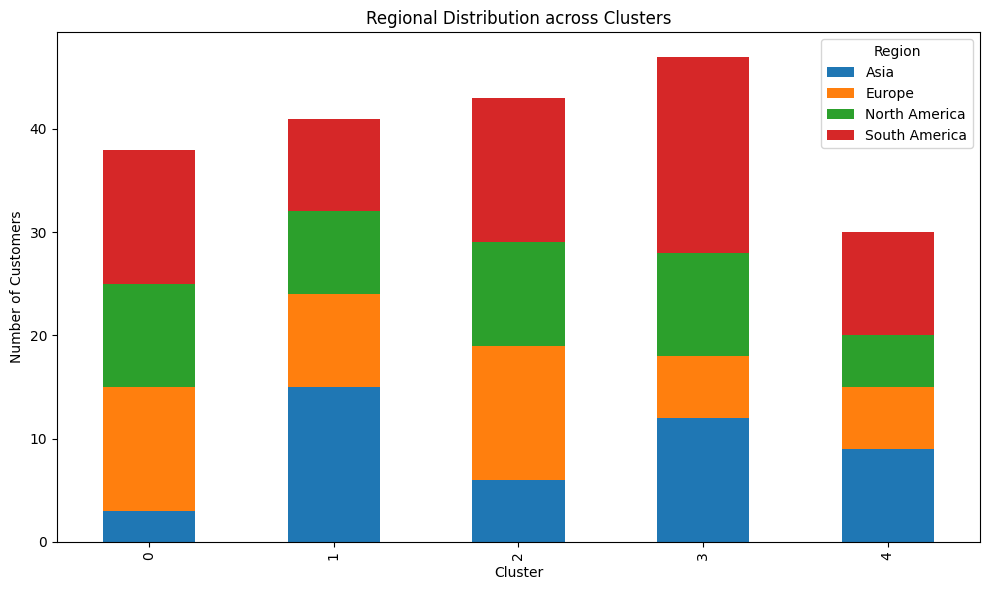

In [21]:
# 1. EDA Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Regional Distribution
regions = customers_df['Region'].value_counts()
axes[0,0].bar(regions.index, regions.values)
axes[0,0].set_title('Customer Distribution by Region')
axes[0,0].tick_params(axis='x', rotation=45)

# Monthly Transaction Values
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
axes[0,1].plot(monthly_sales.index, monthly_sales.values, marker='o')
axes[0,1].set_title('Monthly Transaction Values')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Total Value ($)')

# Product Category Distribution
categories = products_df['Category'].value_counts()
axes[1,0].bar(categories.index, categories.values)
axes[1,0].set_title('Product Distribution by Category')
axes[1,0].tick_params(axis='x', rotation=45)

# Average Transaction Value by Region
avg_trans_by_region = merged_df.groupby('Region')['TotalValue'].mean()
axes[1,1].bar(avg_trans_by_region.index, avg_trans_by_region.values)
axes[1,1].set_title('Average Transaction Value by Region')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Clustering Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(customer_features['total_spend'],
                     customer_features['avg_transaction_value'],
                     c=cluster_labels,
                     s=customer_features['total_transactions']*50,
                     alpha=0.6,
                     cmap='viridis')
plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Value ($)')
plt.title('Customer Segments')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# 3. Additional cluster visualization
plt.figure(figsize=(10, 6))
for i in range(5):
    cluster_data = customer_features[customer_features['Cluster'] == i]
    plt.scatter(cluster_data['total_spend'],
               cluster_data['avg_transaction_value'],
               label=f'Cluster {i}',
               alpha=0.6)

plt.xlabel('Total Spend ($)')
plt.ylabel('Average Transaction Value ($)')
plt.title('Customer Segments by Spending Patterns')
plt.legend()
plt.grid(True)
plt.show()

# 4. Regional Distribution in Clusters
cluster_region_counts = pd.crosstab(customer_features['Cluster'],
                                  [merged_df['Region']])
cluster_region_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Regional Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Region')
plt.tight_layout()
plt.show()